<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Setup---imports" data-toc-modified-id="Setup---imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup - imports</a></span></li><li><span><a href="#Setup---output" data-toc-modified-id="Setup---output-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setup - output</a></span><ul class="toc-item"><li><span><a href="#function-make_path" data-toc-modified-id="function-make_path-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>function make_path</a></span></li><li><span><a href="#set-up-output-configuration" data-toc-modified-id="set-up-output-configuration-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>set up output configuration</a></span></li></ul></li><li><span><a href="#Setup---Functions" data-toc-modified-id="Setup---Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Setup - Functions</a></span><ul class="toc-item"><li><span><a href="#function-plot_precision_recall_n" data-toc-modified-id="function-plot_precision_recall_n-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>function plot_precision_recall_n</a></span></li><li><span><a href="#function-threshold_at_k" data-toc-modified-id="function-threshold_at_k-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>function threshold_at_k</a></span></li><li><span><a href="#function-precision_at_k" data-toc-modified-id="function-precision_at_k-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>function precision_at_k</a></span></li><li><span><a href="#function-recall_at_k" data-toc-modified-id="function-recall_at_k-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>function recall_at_k</a></span></li><li><span><a href="#function-accuracy_at_k" data-toc-modified-id="function-accuracy_at_k-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>function accuracy_at_k</a></span></li><li><span><a href="#function-precision_recall_f1" data-toc-modified-id="function-precision_recall_f1-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>function precision_recall_f1</a></span></li></ul></li></ul></li><li><span><a href="#class-CitationCodingEvaluation" data-toc-modified-id="class-CitationCodingEvaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>class CitationCodingEvaluation</a></span></li><li><span><a href="#Load-JSON-files" data-toc-modified-id="Load-JSON-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load JSON files</a></span></li><li><span><a href="#Process-JSON" data-toc-modified-id="Process-JSON-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Process JSON</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate</a></span><ul class="toc-item"><li><span><a href="#precision,-recall,-and-accuracy" data-toc-modified-id="precision,-recall,-and-accuracy-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>precision, recall, and accuracy</a></span></li><li><span><a href="#precision,-recall,-and-accuracy-per-publication" data-toc-modified-id="precision,-recall,-and-accuracy-per-publication-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>precision, recall, and accuracy per publication</a></span></li><li><span><a href="#graph-precision-and-recall-at-n" data-toc-modified-id="graph-precision-and-recall-at-n-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>graph precision and recall at n</a></span></li><li><span><a href="#output-results-to-file" data-toc-modified-id="output-results-to-file-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>output results to file</a></span></li></ul></li></ul></div>

# Setup

- Back to [Table of Contents](#Table-of-Contents)

In [1]:
# DEBUG
debug_flag = False

## Setup - imports

- Back to [Table of Contents](#Table-of-Contents)

In [2]:
# imports
import datetime
import json
import matplotlib
import matplotlib.pyplot
import numpy
import os
import pandas as pd
import six

# scikit-learn
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Setup - output

- Back to [Table of Contents](#Table-of-Contents)

### function make_path

- Back to [Table of Contents](#Table-of-Contents)

In [3]:
# function to create a path if it does not exist
def make_path(path_to_make):
    if not os.path.exists(path_to_make):
        print("Creating path {}".format(path_to_make))
        os.makedirs(path_to_make)
    else:
        print("{} already exists".format(path_to_make))

    return path_to_make

### set up output configuration

- Back to [Table of Contents](#Table-of-Contents)

In [4]:
# DEBUG
debug_flag = False

# output_to_file flag
output_to_file = True
line_list = None
output_string = None
#output_folder_path = "/data/output"
#output_folder_path = "."
output_folder_path = "/work/evaluate/rcc-14/2018.11.19/evaluate"
make_path( output_folder_path )
results_file_path = "{}/evaluation_results.txt".format( output_folder_path )
precision_recall_graph_path = "{}/precision_recall_graph.pdf".format( output_folder_path )

# if we are outputting to file, start line list.
if ( output_to_file == True ):
    
    # put a list in line_list
    line_list = []
    
#-- END init line list --#

/work/evaluate/rcc-14/2018.11.19/evaluate already exists


## Setup - Functions

- Back to [Table of Contents](#Table-of-Contents)

### function plot_precision_recall_n

- Back to [Table of Contents](#Table-of-Contents)

In [5]:
def plot_precision_recall_n(y_true, y_prob, model_name, output_path_IN = None ):

    """
    y_true: ls 
        ls of ground truth labels
    y_prob: ls
        ls of predic proba from model
    model_name: str
        str of model name (e.g, LR_123)
    """
    
    # imports
    from sklearn.metrics import precision_recall_curve
    
    # return reference
    details_OUT = {}
    
    # declare variables
    y_score = None
    precision_curve = None
    recall_curve = None
    pr_thresholds = None
    num_above_thresh = None
    pct_above_thresh = None
    pct_above_per_thresh = None
    current_score = None
    above_threshold_list = None
    above_threshold_count = -1
    fig = None
    ax1 = None
    ax2 = None
    
    # store the raw scores in y_score
    y_score = y_prob
    
    # calculate precision-recall curve
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
    # Returns:
    # - precision_curve - Precison values such that element i is the precision of predictions where cutoff is score >= thresholds[ i ] and the last element is 1.
    # - recall_curve - Recall values such that element i is the recall of predictions where cutoff is score >= thresholds[ i ] and the last element is 0.
    # - pr_thresholds - Increasing thresholds on the decision function used to decide 1 or 0, used to calculate precision and recall (looks like it is the set of unique values in the predicted value set).
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve( y_true, y_score )
    
    # get all but the last precision score (1).
    precision_curve = precision_curve[ : -1 ]
    # print( "precision_curve: {}".format( precision_curve ) )
    
    # get all but the last recall score (0).
    recall_curve = recall_curve[ : -1 ]
    # print( "recall_curve: {}".format( recall_curve ) )
    
    # store details
    details_OUT[ "precision" ] = precision_curve
    details_OUT[ "recall" ] = recall_curve
    details_OUT[ "threshold" ] = pr_thresholds
    
    # init loop over thresholds
    pct_above_per_thresh = []
    number_scored = len(y_score)
    
    # loop over thresholds
    for value in pr_thresholds:
        
        # at each threshold, calculate the percent of rows above the threshold.
        above_threshold_list = []
        above_threshold_count = -1
        for current_score in y_score:
            
            # is it at or above threshold?
            if ( current_score >= value ):
                
                # it is either at or above threshold - add to list.
                above_threshold_list.append( current_score )
                
            #-- END check to see if at or above threshold? --#
                
        #-- END loop over scores. --#

        # how many above threshold?
        #num_above_thresh = len(y_score[y_score>=value])
        above_threshold_count = len( above_threshold_list )
        num_above_thresh = above_threshold_count
        
        # percent above threshold
        pct_above_thresh = num_above_thresh / float( number_scored )
        
        # add to list.
        pct_above_per_thresh.append( pct_above_thresh )
        
    #-- END loop over thresholds --#

    details_OUT[ "percent_above" ] = pct_above_per_thresh
    
    # convert to numpy array
    pct_above_per_thresh = numpy.array(pct_above_per_thresh)

    # init matplotlib
    matplotlib.pyplot.clf()
    fig, ax1 = matplotlib.pyplot.subplots()
    
    # plot precision line
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax1.set_ylim(0,1.05)
    
    # plot recall line
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax2.set_ylim(0,1.05)
    
    # finish off graph
    name = model_name
    matplotlib.pyplot.title(name)
    
    # is there an output path?
    if ( ( output_path_IN is not None ) and ( output_path_IN != "" ) ):
    
        # save the figure to file.
        matplotlib.pyplot.savefig( output_path_IN )
    
    #-- END check to see if we output to disk. --#
    
    matplotlib.pyplot.show()

    # clear plot.
    matplotlib.pyplot.clf()
    
    return details_OUT
    
#-- END function plot_precision_recall_n() --#

print( "function plot_precision_recall_n() defined at {}".format( datetime.datetime.now() ) )

function plot_precision_recall_n() defined at 2018-11-21 13:16:15.924563


### function threshold_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [6]:
def threshold_at_k( y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    value_list = None
    threshold_index = -1
    
    # sort values
    value_list = numpy.sort( y_scores )
    
    # reverse order of list
    value_list = value_list[ : : -1 ]
    
    # calculate index of value that is k% of the way through the sorted distribution of scores
    threshold_index = int( k * len( y_scores ) )
    
    # get value that is k% of the way through the sorted distribution of scores
    value_OUT = value_list[ threshold_index ]
    
    print( "Threshold: {}".format( value_OUT ) )
    
    return value_OUT

#-- END function threshold_at_k() --#

print( "function threshold_at_k() defined at {}".format( datetime.datetime.now() ) )

function threshold_at_k() defined at 2018-11-21 13:16:15.930228


### function precision_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [7]:
def precision_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate precision
    value_OUT = precision_score( y_true, y_pred )
    
    return value_OUT

#-- END function precision_at_k() --#

print( "function precision_at_k() defined at {}".format( datetime.datetime.now() ) )

function precision_at_k() defined at 2018-11-21 13:16:15.935204


### function recall_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [8]:
def recall_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate recall
    value_OUT = recall_score( y_true, y_pred )
    
    return value_OUT

#-- END function recall_at_k() --#

print( "function recall_at_k() defined at {}".format( datetime.datetime.now() ) )

function recall_at_k() defined at 2018-11-21 13:16:15.940570


### function accuracy_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [9]:
def accuracy_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate accuracy
    value_OUT = accuracy_score( y_true, y_pred )
    
    return value_OUT

#-- END function accuracy_at_k() --#

print( "function accuracy_at_k() defined at {}".format( datetime.datetime.now() ) )

function accuracy_at_k() defined at 2018-11-21 13:16:15.947069


### function precision_recall_f1

- Back to [Table of Contents](#Table-of-Contents)

In [10]:
# calculation methods
CALCULATION_METHOD_DEFAULT = "default"
CALCULATION_METHOD_BINARY = "binary"
CACLULATION_METHOD_MACRO = "macro"
CALCULATION_METHOD_MICRO = "micro"
CALCULATION_METHOD_WEIGHTED = "weighted"

# return items
RETURN_CONFUSION_MATRIX = "confusion_matrix"
RETURN_METHOD_TO_RESULT_MAP = "method_to_result_map"
RETURN_LINE_LIST = "line_list"

def precision_recall_f1( baseline_list_IN, predicted_list_IN, calculation_methods_list_IN, do_print_IN = True, output_to_file_IN = output_to_file ):

    # return reference
    output_dict_OUT = {}
    
    # declare variables
    output_string = None
    my_line_list = None
    calculation_methods = None
    cm = None
    method_to_result_map = None
    calculation_method = None
    precision = None
    recall = None
    accuracy = None
    F1 = None
    support = None
    
    # declare variables - default algorithm
    default_evaluation = None
    default_precision_list = None
    default_recall_list = None
    default_F1_list = None
    default_support_list = None
    precision_list_length = None
    recall_list_length = None
    F1_list_length = None

    # init
    my_line_list = []
    
    # init - calculation methods to include and lists
    calculation_methods = calculation_methods_list_IN
    baseline_list = baseline_list_IN
    derived_binary_list = predicted_list_IN

    # confusion matrix
    cm = metrics.confusion_matrix( baseline_list, derived_binary_list )
    
    # RETURN - store confusion matrix
    output_dict_OUT[ RETURN_CONFUSION_MATRIX ] = cm

    # output
    output_string = "\nConfusion matrix:\n{}\n\nBinary Key:\n[[ TN, FP ]\n [ FN, TP ]]".format( cm )
    if ( do_print_IN == True ):
        print( output_string )
    #-- END if do_print_IN --#

    # if output to file...
    if ( output_to_file_IN == True ):

        # store line for output
        my_line_list.append( output_string )

    #-- END if output... --#

    # loop over calculation methods
    method_to_result_map = {}
    for calculation_method in calculation_methods:
        
        # RETURN - create map for method
        

        # output
        output_string = "\n==> {}".format( calculation_method )
        if ( do_print_IN == True ):
            print( output_string )
        #-- END if do_print_IN --#

        # if output to file...
        if ( output_to_file_IN == True ):

            # store line for output
            my_line_list.append( output_string )

        #-- END if output... --#

        # binary?  If so, do basic calculations as sanity check.
        if ( calculation_method == CALCULATION_METHOD_BINARY ):

            # calculate precision, recall, accuracy...

            # ==> precision
            precision = metrics.precision_score( baseline_list, derived_binary_list )

            # output
            output_string = "\n- {} metrics.precision_score = {}".format( calculation_method, precision )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

            # ==> recall
            recall = metrics.recall_score( baseline_list, derived_binary_list )

            # output
            output_string = "- {} metrics.recall_score = {}".format( calculation_method, recall )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

            # ==> accuracy
            accuracy = metrics.accuracy_score( baseline_list, derived_binary_list )

            # output
            output_string = "- {} metrics.accuracy_score = {}".format( calculation_method, accuracy )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

        #-- END check to see if CALCULATION_METHOD_BINARY --#

        # calculate based on calculation method.

        # default?
        if ( calculation_method == CALCULATION_METHOD_DEFAULT ):

            # default metrics and F-Score - default returns a list for each of
            #     the scores per label, so get list and output, don't pick one or
            #     another value.
            default_evaluation = metrics.precision_recall_fscore_support( baseline_list, derived_binary_list )
            default_precision_list = default_evaluation[ 0 ]
            default_recall_list = default_evaluation[ 1 ]
            default_F1_list = default_evaluation[ 2 ]
            default_support_list = default_evaluation[ 3 ]

            # output lists
            output_string = "\ndefault lists:"
            output_string += "\n- precision list = {}".format( default_precision_list )
            output_string += "\n- recall list = {}".format( default_recall_list )
            output_string += "\n- F1 list = {}".format( default_F1_list )
            output_string += "\n- support list = {}".format( default_support_list )

            # add to results map
            method_to_result_map[ calculation_method ] = default_evaluation

            # look at length of lists (should all be the same).
            precision_list_length = len( default_precision_list )
            recall_list_length = len( default_recall_list )
            F1_list_length = len( default_F1_list )

            output_string += "\n\nlist lengths: {}".format( precision_list_length )

            if ( precision_list_length > 2 ):

                # binary, but list is greater than 2, not binary - output message.
                output_string += "\n- NOTE: default output lists have more than two entries - your data is not binary."

            #-- END check to see if list length greater than 2 --#

            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

        # all others are just argument to "average" parameter, result in one number per
        #     derived score.  For now, implement them the same.
        else:

            # F-Score
            evaluation_tuple = metrics.precision_recall_fscore_support( baseline_list, derived_binary_list, average = calculation_method )
            precision = evaluation_tuple[ 0 ]
            recall = evaluation_tuple[ 1 ]
            F1 = evaluation_tuple[ 2 ]
            support = evaluation_tuple[ 3 ]

            # add to results map
            method_to_result_map[ calculation_method ] = evaluation_tuple

            # output
            output_string = "\n{}: precision = {}, recall = {}, F1 = {}, support = {}".format( calculation_method, precision, recall, F1, support )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output to file...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

        #-- END default F-Score --#

    #-- END loop over calculation_methods --#

    # RETURN - method-to-result map
    output_dict_OUT[ RETURN_METHOD_TO_RESULT_MAP ] = method_to_result_map
    
    # RETURN - store line_list
    output_dict_OUT[ RETURN_LINE_LIST ] = my_line_list

    return output_dict_OUT
    
#-- END function precision_recall_f1() --#

# class CitationCodingEvaluation

- Back to [Table of Contents](#Table-of-Contents)

In [11]:
from citation_coding_evaluation import CitationCodingEvaluation

# Load JSON files

- Back to [Table of Contents](#Table-of-Contents)

In [12]:
# file paths

# for in-repo development
baseline_json_path = "/work/evaluate/rcc-14/data/input/data_set_citations.json"
# set to "../../data/output" for running against in-repo code development
#derived_prefix = "../../data/output"

# holdout
#baseline_json_path = "/work/evaluate/data/holdout/data/input/data_set_citations.json"
derived_prefix = "/work/evaluate/rcc-14/2018.11.19/results"

derived_json_path = "{}/data_set_citations.json".format( derived_prefix )

In [13]:
# load the baseline JSON
baseline_json_file = None
baseline_json = None

# if output...
output_string = "Reading baseline/ground_truth file: {}".format( baseline_json_path )
print( output_string )

if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )

#-- END if output to file... --#

# baseline
with open( baseline_json_path ) as baseline_json_file:

    # load the JSON from the file.
    baseline_json = json.load( baseline_json_file )

#-- END with...as --#

Reading baseline/ground_truth file: /work/evaluate/rcc-14/data/input/data_set_citations.json


In [14]:
# load the derived JSON
derived_json_file = None
derived_json = None

# if output...
output_string = "Reading derived/predicted file: {}".format( derived_json_path )
print( output_string )

if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output to file... --#

# baseline
with open( derived_json_path ) as derived_json_file:

    # load the JSON from the file.
    derived_json = json.load( derived_json_file )

#-- END with...as --#

Reading derived/predicted file: /work/evaluate/rcc-14/2018.11.19/results/data_set_citations.json


In [15]:
baseline_json

[{'citation_id': 1938,
  'publication_id': 102,
  'data_set_id': 304,
  'mention_list': ['Deutsche Bundesbank (Interest Rates Statistics) for data on bank lending',
   'Interest Rates Statistics',
   'MIR'],
  'score': 1.0},
 {'citation_id': 1939,
  'publication_id': 103,
  'data_set_id': 305,
  'mention_list': ['bank supervisory data of the Deutsche Bundesbank',
   'credit register'],
  'score': 1.0},
 {'citation_id': 1940,
  'publication_id': 103,
  'data_set_id': 306,
  'mention_list': ['Monthly Balance Sheet Statistic of the Deutsche Bundesbank',
   'Monthly Balance Sheet Statistics',
   'https://www.bundesbank.de/Redaktion/EN/Standardartikel/Service/Reporting_systems/monthly_balance_ sheet_statistics.html?https=1'],
  'score': 1.0},
 {'citation_id': 1941,
  'publication_id': 103,
  'data_set_id': 307,
  'mention_list': [],
  'score': 1.0},
 {'citation_id': 1942,
  'publication_id': 103,
  'data_set_id': 308,
  'mention_list': ['Securities Holdings Statistics'],
  'score': 1.0},
 {

In [16]:
derived_json

[{'publication_id': 102,
  'data_set_id': 306,
  'score': 0.9498455351764391,
  'mention_list': ['balance sheet statistics',
   'monthly balance sheet statistics']},
 {'publication_id': 103,
  'data_set_id': 308,
  'score': 0.7774349559850926,
  'mention_list': ['securities holdings statistics']},
 {'publication_id': 103,
  'data_set_id': 306,
  'score': 0.934066302543757,
  'mention_list': ['monthly balance sheet statistics']},
 {'publication_id': 103,
  'data_set_id': 305,
  'score': 0.9880981682771546,
  'mention_list': ['credit register']},
 {'publication_id': 103,
  'data_set_id': 346,
  'score': 0.9318108287786725,
  'mention_list': ['securities holdings statistics of the deutsche bundesbank']},
 {'publication_id': 104,
  'data_set_id': 306,
  'score': 0.8780075384045053,
  'mention_list': ['balance sheet data']},
 {'publication_id': 106,
  'data_set_id': 313,
  'score': 0.7965614628662834,
  'mention_list': ['monthly bank balance sheet statistics']},
 {'publication_id': 106,
  '

# Process JSON

- Back to [Table of Contents](#Table-of-Contents)

In [17]:
# init class to handle evaluation
coding_evaluator = CitationCodingEvaluation()
coding_evaluator.debug_flag = debug_flag

In [18]:
# process baseline JSON
result_type = CitationCodingEvaluation.RESULT_TYPE_BASELINE
citation_json = baseline_json
status = coding_evaluator.process_citation_json( citation_json, result_type )

# output
output_string = "Processing status for {} (None = Success!): \"{}\"".format( result_type, status )
print( output_string )

# if output...
if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output... --#


Processing status for baseline (None = Success!): "None"


In [19]:
# process derived JSON
result_type = CitationCodingEvaluation.RESULT_TYPE_DERIVED
citation_json = derived_json
status = coding_evaluator.process_citation_json( citation_json, result_type )

# output
output_string = "Processing status for {} (None = Success!): \"{}\"".format( result_type, status )
print( output_string )

# if output...
if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output... --#


Processing status for derived (None = Success!): "None"


# Evaluate

- Back to [Table of Contents](#Table-of-Contents)

In [20]:
# create lists
status = coding_evaluator.create_evaluation_lists()
baseline_list = coding_evaluator.get_baseline_list()
derived_raw_list = coding_evaluator.get_derived_raw_list()
derived_binary_list = coding_evaluator.get_derived_binary_list()
publication_id_per_citation_list = coding_evaluator.get_publication_id_list()
data_set_id_per_citation_list = coding_evaluator.get_data_set_id_list()

## precision, recall, and accuracy

- Back to [Table of Contents](#Table-of-Contents)

In [21]:
# calculation methods to include
calculation_methods = []
calculation_methods.append( CALCULATION_METHOD_DEFAULT )
calculation_methods.append( CALCULATION_METHOD_BINARY )
#calculation_methods.append( CACLULATION_METHOD_MACRO )
#calculation_methods.append( CALCULATION_METHOD_MICRO )
#calculation_methods.append( CALCULATION_METHOD_WEIGHTED )

# call function to do work.
output_dictionary = precision_recall_f1( baseline_list, derived_binary_list, calculation_methods )

# add lines from output to line_list
line_list = line_list + output_dictionary.get( "line_list", [] )
line_list.append( "\n" )

print( "----> output dictionary: {}".format( output_dictionary ) )


Confusion matrix:
[[   0 7428]
 [4448  874]]

Binary Key:
[[ TN, FP ]
 [ FN, TP ]]

==> default

default lists:
- precision list = [0.         0.10527584]
- recall list = [0.         0.16422398]
- F1 list = [0.         0.12830299]
- support list = [7428 5322]

list lengths: 2

==> binary

- binary metrics.precision_score = 0.10527583714767526
- binary metrics.recall_score = 0.1642239759488914
- binary metrics.accuracy_score = 0.06854901960784314

binary: precision = 0.10527583714767526, recall = 0.1642239759488914, F1 = 0.12830299471520845, support = None
----> output dictionary: {'confusion_matrix': array([[   0, 7428],
       [4448,  874]]), 'method_to_result_map': {'default': (array([0.        , 0.10527584]), array([0.        , 0.16422398]), array([0.        , 0.12830299]), array([7428, 5322])), 'binary': (0.10527583714767526, 0.1642239759488914, 0.12830299471520845, None)}, 'line_list': ['\nConfusion matrix:\n[[   0 7428]\n [4448  874]]\n\nBinary Key:\n[[ TN, FP ]\n [ FN, TP ]]', 

## precision, recall, and accuracy per publication

- Back to [Table of Contents](#Table-of-Contents)

In [22]:
# declare variables
pub_debug_flag = False
publication_to_lists_map = coding_evaluator.get_lists_by_publication()
pub_publication_id_list = []
pub_false_positive_list = []
pub_calculation_methods = []
#calculation_methods.append( CALCULATION_METHOD_DEFAULT )
pub_calculation_methods.append( CALCULATION_METHOD_BINARY )
#calculation_methods.append( CACLULATION_METHOD_MACRO )
#calculation_methods.append( CALCULATION_METHOD_MICRO )
#calculation_methods.append( CALCULATION_METHOD_WEIGHTED )
pub_output_dictionary = None
pub_confusion_matrix = None
pub_false_positive_count = None
pub_false_positive_array = None
pub_false_positive_mean = None
item_index = None
current_count = None
output_string = None

for publication_id in six.iterkeys( publication_to_lists_map ):
    
    if ( debug_flag == True ):
        print( "Publication ID: {}".format( publication_id ) )
    #-- END debug --#
    
    # get lists
    pub_list_dictionary = publication_to_lists_map.get( publication_id, None )
    pub_baseline_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_BASELINE, None )
    pub_derived_binary_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_DERIVED_BINARY, None )
    pub_derived_raw_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_DERIVED_RAW, None )
    pub_publication_id_per_citation_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_PUBLICATION_ID, None )
    pub_data_set_id_per_citation_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_DATA_SET_ID, None )
    
    if ( debug_flag == True ):
        # print lists:
        print( "====> baseline......: {}".format( pub_baseline_list ) )
        print( "====> derived_binary: {}".format( pub_derived_binary_list ) )
        print( "====> derived_raw...: {}".format( pub_derived_raw_list ) )
        print( "====> publication_id: {}".format( pub_publication_id_per_citation_list ) )
        print( "====> data_set_id...: {}".format( pub_data_set_id_per_citation_list ) )
    #-- END debug --#
    
    # call the precision and recall function
    pub_output_dictionary = precision_recall_f1( pub_baseline_list, pub_derived_binary_list, pub_calculation_methods, do_print_IN = pub_debug_flag )

    if ( debug_flag == True ):
        print( "----> pub output dictionary: {}".format( pub_output_dictionary ) )
    #-- END debug --#
    
    # get confusion matrix
    pub_confusion_matrix = pub_output_dictionary.get( RETURN_CONFUSION_MATRIX, None )
    if ( pub_confusion_matrix is not None ):
        
        # try to get false positives (cm[ 0 ][ 1 ]).  If exception, is 0.
        try:
            
            pub_false_positive_count = pub_confusion_matrix[ 0 ][ 1 ]

            if ( debug_flag == True ):
                print( "found FP!" )
            #-- END debug --#
            
        except:

            if ( debug_flag == True ):
                print( "no FP!" )
            #-- END debug --#
            
            # index doesn't exist.  Set to 0.
            pub_false_positive_count = 0
            
        #-- END try...except. --#
        
        # add id and count to list.
        pub_publication_id_list.append( publication_id )
        pub_false_positive_list.append( pub_false_positive_count )
        
    else:
        
        # no confusion matrix
        print( "ERROR - no confusion matrix!" )
        
    #-- END check to see if confusion matrix --#
    
#-- END loop over per-publication lists --#

if ( debug_flag == True ):
    print( pub_publication_id_list )
    print( pub_false_positive_list )
#-- END debug --#

# convert false positive list to a numpy array and get the mean
pub_false_positive_array = numpy.array( pub_false_positive_list )
pub_false_positive_mean = numpy.mean( pub_false_positive_array )

# loop over items, flag any that are over mean
item_index = -1
for current_count in pub_false_positive_list:
    
    # increment index
    item_index += 1

    # get publication ID
    publication_id = pub_publication_id_list[ item_index ]
    
    # is count greater than mean?
    if ( current_count > pub_false_positive_mean ):
        
        # output for review
        output_string = "pub {} FP {} > mean ( {} )".format( publication_id, current_count, pub_false_positive_mean )
        print( output_string )
        line_list.append( output_string )
        
    else:
        
        if ( debug_flag == True ):
            print( "pub {} FP {} <= mean ( {} )".format( publication_id, current_count, pub_false_positive_mean ) )
        #-- END debug --#
        
    #-- END loop over false positives. --#
    
#-- END loop over publications --#

/home/ubuntu/.virtualenvs/rich_context/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/ubuntu/.virtualenvs/rich_context/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


pub 107 FP 2 > mean ( 1.6429993364299933 )
pub 112 FP 2 > mean ( 1.6429993364299933 )
pub 128 FP 2 > mean ( 1.6429993364299933 )
pub 130 FP 2 > mean ( 1.6429993364299933 )
pub 144 FP 2 > mean ( 1.6429993364299933 )
pub 146 FP 2 > mean ( 1.6429993364299933 )
pub 147 FP 3 > mean ( 1.6429993364299933 )
pub 150 FP 3 > mean ( 1.6429993364299933 )
pub 151 FP 4 > mean ( 1.6429993364299933 )
pub 154 FP 2 > mean ( 1.6429993364299933 )
pub 156 FP 3 > mean ( 1.6429993364299933 )
pub 162 FP 2 > mean ( 1.6429993364299933 )
pub 2825 FP 4 > mean ( 1.6429993364299933 )
pub 2854 FP 2 > mean ( 1.6429993364299933 )
pub 2855 FP 4 > mean ( 1.6429993364299933 )
pub 2870 FP 2 > mean ( 1.6429993364299933 )
pub 2873 FP 2 > mean ( 1.6429993364299933 )
pub 2878 FP 2 > mean ( 1.6429993364299933 )
pub 2887 FP 2 > mean ( 1.6429993364299933 )
pub 2889 FP 2 > mean ( 1.6429993364299933 )
pub 2945 FP 2 > mean ( 1.6429993364299933 )
pub 2954 FP 2 > mean ( 1.6429993364299933 )
pub 3162 FP 3 > mean ( 1.6429993364299933 )


In [23]:
# output all the full lists
current_index = -1
for item in publication_id_per_citation_list:
    
    # increment index
    current_index += 1
    
    # get current values.
    baseline_value = baseline_list[ current_index ]
    derived_raw_value = derived_raw_list[ current_index ]
    derived_binary_value = derived_binary_list[ current_index ]
    pub_id_value = publication_id_per_citation_list[ current_index ]
    data_set_id_value = data_set_id_per_citation_list[ current_index ]
    
    print( "{}: pub ID {} - data set ID {} - baseline {} - binary {} - raw {}".format( current_index, pub_id_value, data_set_id_value, baseline_value, derived_binary_value, derived_raw_value ) )
    
#-- END loop over full lists. --#

0: pub ID 102 - data set ID 304 - baseline 1.0 - binary 0.0 - raw 0.0
1: pub ID 102 - data set ID 306 - baseline 0.0 - binary 1.0 - raw 0.9498455351764391
2: pub ID 103 - data set ID 305 - baseline 1.0 - binary 1.0 - raw 0.9880981682771546
3: pub ID 103 - data set ID 306 - baseline 1.0 - binary 1.0 - raw 0.934066302543757
4: pub ID 103 - data set ID 307 - baseline 1.0 - binary 0.0 - raw 0.0
5: pub ID 103 - data set ID 308 - baseline 1.0 - binary 1.0 - raw 0.7774349559850926
6: pub ID 103 - data set ID 346 - baseline 0.0 - binary 1.0 - raw 0.9318108287786725
7: pub ID 104 - data set ID 306 - baseline 0.0 - binary 1.0 - raw 0.8780075384045053
8: pub ID 104 - data set ID 309 - baseline 1.0 - binary 0.0 - raw 0.0
9: pub ID 104 - data set ID 310 - baseline 1.0 - binary 0.0 - raw 0.0
10: pub ID 106 - data set ID 307 - baseline 1.0 - binary 0.0 - raw 0.0
11: pub ID 106 - data set ID 308 - baseline 0.0 - binary 1.0 - raw 0.751180275735748
12: pub ID 106 - data set ID 313 - baseline 1.0 - binar

991: pub ID 5937 - data set ID 63 - baseline 1.0 - binary 0.0 - raw 0.0
992: pub ID 5937 - data set ID 64 - baseline 1.0 - binary 0.0 - raw 0.0
993: pub ID 5937 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
994: pub ID 5938 - data set ID 480 - baseline 0.0 - binary 1.0 - raw 0.9533792798186156
995: pub ID 5938 - data set ID 832 - baseline 1.0 - binary 0.0 - raw 0.0
996: pub ID 5939 - data set ID 5163 - baseline 1.0 - binary 0.0 - raw 0.0
997: pub ID 5940 - data set ID 40 - baseline 0.0 - binary 1.0 - raw 0.7882513168601009
998: pub ID 5940 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9304410384200089
999: pub ID 5940 - data set ID 735 - baseline 1.0 - binary 0.0 - raw 0.0
1000: pub ID 5940 - data set ID 2627 - baseline 1.0 - binary 0.0 - raw 0.0
1001: pub ID 5940 - data set ID 4554 - baseline 1.0 - binary 0.0 - raw 0.0
1002: pub ID 5941 - data set ID 153 - baseline 1.0 - binary 0.0 - raw 0.0
1003: pub ID 5941 - data set ID 154 - baseline 1.0 - binary 1

2520: pub ID 6339 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9064041964877005
2521: pub ID 6340 - data set ID 154 - baseline 0.0 - binary 1.0 - raw 0.8623007115993835
2522: pub ID 6340 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
2523: pub ID 6340 - data set ID 2765 - baseline 1.0 - binary 0.0 - raw 0.0
2524: pub ID 6341 - data set ID 508 - baseline 1.0 - binary 0.0 - raw 0.0
2525: pub ID 6341 - data set ID 509 - baseline 1.0 - binary 0.0 - raw 0.0
2526: pub ID 6341 - data set ID 510 - baseline 1.0 - binary 0.0 - raw 0.0
2527: pub ID 6341 - data set ID 511 - baseline 1.0 - binary 0.0 - raw 0.0
2528: pub ID 6341 - data set ID 512 - baseline 1.0 - binary 0.0 - raw 0.0
2529: pub ID 6341 - data set ID 513 - baseline 1.0 - binary 0.0 - raw 0.0
2530: pub ID 6341 - data set ID 517 - baseline 1.0 - binary 0.0 - raw 0.0
2531: pub ID 6341 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
2532: pub ID 6341 - data set ID 779 - baseline 1.0 

3305: pub ID 6502 - data set ID 468 - baseline 0.0 - binary 1.0 - raw 0.9879601837016816
3306: pub ID 6502 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
3307: pub ID 6502 - data set ID 3834 - baseline 1.0 - binary 0.0 - raw 0.0
3308: pub ID 6502 - data set ID 8558 - baseline 1.0 - binary 0.0 - raw 0.0
3309: pub ID 6503 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.9973304530795521
3310: pub ID 6503 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.940511415679205
3311: pub ID 6503 - data set ID 785 - baseline 1.0 - binary 1.0 - raw 0.9549750630395484
3312: pub ID 6504 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
3313: pub ID 6504 - data set ID 7291 - baseline 1.0 - binary 0.0 - raw 0.0
3314: pub ID 6505 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
3315: pub ID 6505 - data set ID 3574 - baseline 1.0 - binary 0.0 - raw 0.0
3316: pub ID 6506 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.951312

5035: pub ID 6890 - data set ID 441 - baseline 0.0 - binary 1.0 - raw 0.6831971810508192
5036: pub ID 6890 - data set ID 481 - baseline 1.0 - binary 0.0 - raw 0.0
5037: pub ID 6890 - data set ID 482 - baseline 1.0 - binary 0.0 - raw 0.0
5038: pub ID 6890 - data set ID 483 - baseline 1.0 - binary 0.0 - raw 0.0
5039: pub ID 6890 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9330555808310955
5040: pub ID 6891 - data set ID 573 - baseline 1.0 - binary 0.0 - raw 0.0
5041: pub ID 6891 - data set ID 574 - baseline 0.0 - binary 1.0 - raw 0.7130335251571861
5042: pub ID 6891 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9318170519851163
5043: pub ID 6891 - data set ID 1005 - baseline 0.0 - binary 1.0 - raw 0.9021231183442985
5044: pub ID 6892 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
5045: pub ID 6892 - data set ID 679 - baseline 0.0 - binary 1.0 - raw 0.6718063521773028
5046: pub ID 6892 - data set ID 8024 - baseline 1.0 - binary 0.0 - raw 0.0
5047:

5959: pub ID 7112 - data set ID 931 - baseline 1.0 - binary 0.0 - raw 0.0
5960: pub ID 7113 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.9980099319017822
5961: pub ID 7113 - data set ID 570 - baseline 0.0 - binary 1.0 - raw 0.9556298608586343
5962: pub ID 7113 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
5963: pub ID 7114 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.9957426849285042
5964: pub ID 7115 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.994743561908963
5965: pub ID 7115 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9281349401985199
5966: pub ID 7116 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.9997055515368118
5967: pub ID 7116 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9807149090968686
5968: pub ID 7117 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.9948899087955116
5969: pub ID 7118 - data set ID 438 - baseline 1.0 - binary 1.0 - raw 0.9964348698257395
5970: pub ID 7118 - data set ID 458 -

7491: pub ID 7471 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9848119412372698
7492: pub ID 7471 - data set ID 679 - baseline 0.0 - binary 1.0 - raw 0.8878120569019681
7493: pub ID 7471 - data set ID 680 - baseline 1.0 - binary 0.0 - raw 0.0
7494: pub ID 7471 - data set ID 1233 - baseline 0.0 - binary 1.0 - raw 0.7888166527096336
7495: pub ID 7471 - data set ID 1911 - baseline 1.0 - binary 0.0 - raw 0.0
7496: pub ID 7471 - data set ID 2773 - baseline 1.0 - binary 0.0 - raw 0.0
7497: pub ID 7472 - data set ID 152 - baseline 0.0 - binary 1.0 - raw 0.7097592953051972
7498: pub ID 7472 - data set ID 154 - baseline 0.0 - binary 1.0 - raw 0.8458542035911695
7499: pub ID 7472 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9513128806919374
7500: pub ID 7472 - data set ID 684 - baseline 0.0 - binary 1.0 - raw 0.9815798651786833
7501: pub ID 7472 - data set ID 688 - baseline 1.0 - binary 0.0 - raw 0.0
7502: pub ID 7472 - data set ID 689 - baseline 1.0 - binary 0.0 - raw 0.0
7503

8222: pub ID 7643 - data set ID 441 - baseline 0.0 - binary 1.0 - raw 0.670485837684978
8223: pub ID 7643 - data set ID 3579 - baseline 1.0 - binary 0.0 - raw 0.0
8224: pub ID 7644 - data set ID 445 - baseline 0.0 - binary 1.0 - raw 0.6924275511056138
8225: pub ID 7644 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.8637229815073053
8226: pub ID 7644 - data set ID 8116 - baseline 1.0 - binary 0.0 - raw 0.0
8227: pub ID 7645 - data set ID 455 - baseline 0.0 - binary 1.0 - raw 0.9415378838376494
8228: pub ID 7645 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9260758027037368
8229: pub ID 7645 - data set ID 8116 - baseline 1.0 - binary 0.0 - raw 0.0
8230: pub ID 7646 - data set ID 441 - baseline 0.0 - binary 1.0 - raw 0.7654739009759073
8231: pub ID 7646 - data set ID 450 - baseline 0.0 - binary 1.0 - raw 0.8467743059187031
8232: pub ID 7646 - data set ID 538 - baseline 0.0 - binary 1.0 - raw 0.7929730708892473
8233: pub ID 7646 - data set ID 671 - baseline 0.0 - binary 1.0 

9987: pub ID 8090 - data set ID 8024 - baseline 1.0 - binary 0.0 - raw 0.0
9988: pub ID 8091 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.931804064462999
9989: pub ID 8091 - data set ID 679 - baseline 0.0 - binary 1.0 - raw 0.8577848186650712
9990: pub ID 8091 - data set ID 683 - baseline 1.0 - binary 0.0 - raw 0.0
9991: pub ID 8091 - data set ID 1233 - baseline 0.0 - binary 1.0 - raw 0.7026829612377473
9992: pub ID 8092 - data set ID 154 - baseline 0.0 - binary 1.0 - raw 0.911126911172787
9993: pub ID 8092 - data set ID 641 - baseline 1.0 - binary 0.0 - raw 0.0
9994: pub ID 8092 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9540862506778882
9995: pub ID 8092 - data set ID 679 - baseline 0.0 - binary 1.0 - raw 0.8602632586296743
9996: pub ID 8092 - data set ID 692 - baseline 0.0 - binary 1.0 - raw 0.790450821747939
9997: pub ID 8092 - data set ID 826 - baseline 0.0 - binary 1.0 - raw 0.9819112227568134
9998: pub ID 8092 - data set ID 1317 - baseline 1.0 - binary 0.0 - 

10987: pub ID 8988 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9534436277918878
10988: pub ID 8989 - data set ID 54 - baseline 0.0 - binary 1.0 - raw 0.9312134268748052
10989: pub ID 8989 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827194
10990: pub ID 8989 - data set ID 783 - baseline 0.0 - binary 1.0 - raw 0.6736893800319218
10991: pub ID 8990 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9719778403297814
10992: pub ID 8991 - data set ID 136 - baseline 0.0 - binary 1.0 - raw 0.6843389652856521
10993: pub ID 8991 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9801934696000248
10994: pub ID 8992 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827194
10995: pub ID 8993 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.8957144182373187
10996: pub ID 8994 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827199
10997: pub ID 8994 - data set ID 908 - baseline 0.0 - binary 1.0 - raw 0.9418365954058504
10998: pub 

12624: pub ID 10498 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827199
12625: pub ID 10499 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9724174010730299
12626: pub ID 10500 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9721128025580389
12627: pub ID 10501 - data set ID 730 - baseline 0.0 - binary 1.0 - raw 0.7272960783675824
12628: pub ID 10502 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827194
12629: pub ID 10503 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827196
12630: pub ID 10505 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9724174010730299
12631: pub ID 10506 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9747498412827194
12632: pub ID 10507 - data set ID 671 - baseline 0.0 - binary 1.0 - raw 0.9724174010730299
12633: pub ID 10507 - data set ID 1217 - baseline 0.0 - binary 1.0 - raw 0.8654703220110671
12634: pub ID 10508 - data set ID 487 - baseline 0.0 - binary 1.0 - raw 0.690406355798012

## graph precision and recall at n

- Back to [Table of Contents](#Table-of-Contents)

<Figure size 432x288 with 0 Axes>

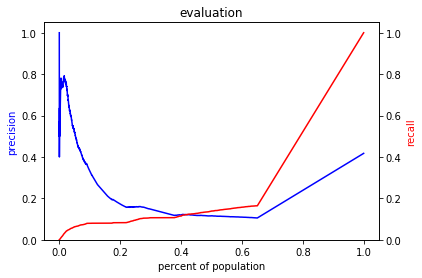

<Figure size 432x288 with 0 Axes>

In [24]:
# output to file?
if ( output_to_file == True ):
    
    # output figure to file
    plot_precision_recall_n( baseline_list, derived_raw_list, "evaluation", output_path_IN = precision_recall_graph_path )

else:
    
    # just output to standard out (as is possible)
    plot_precision_recall_n( baseline_list, derived_raw_list, "evaluation" )

#-- END check to see if output graph to file --#

## output results to file

- Back to [Table of Contents](#Table-of-Contents)

In [25]:
# declare variables
results_file = None
line_list_string = None

# do we output to file?
if ( output_to_file == True ):
    
    # yes.  open output file.
    with open( results_file_path, mode = "w" ) as results_file:

        # join line list with "/n", then write.
        line_list_string = "\n".join( line_list )
        results_file.write( line_list_string )

    #-- END with...as --#    
    
#-- END check to see if we output to file --#